<h1>Isaiah Pinto</h1>
<h3>October 2, 2023</h3>

<h3>Introduction</h3>

In the last few years we were faced with a grave challenge across the world. COVID 19 affected every country, some were prepared, but there are also countries that were not and have faced massive consequences. In this project I have gathered data from various online sources such as Wikipedia, and Wisevoter on each country.  I have conducted analysis to see if there are significant difference from the performances of each country depending on their level of development, the Human Development Index. This index measures the country's performance on living standards, health, and education which is consolidated by the United Nations to compute for the index. There are several questions that I wish to be answered in this project which are listed below:

1. How many countries are there per continent present in our dataset?
2. Which countries have the highest of the three different metrics we have mentioned?
3. How is the different Country Development distributed per Continent?
4. Which continents have the highest of the three different metrics we have mentioned?
5. How many are countries in each of the Country Development?
6. Are there any significant difference for the three metrics amongst the different country development levels?
7. What were the outliers?

<h3>Insights</h3>

Overall I was able to see that there is really a significant difference between the performances of Very Highly Developed countries compared to the other categories. Given that these countries have more capacities to counter COVID 19 they were able to protect their citizens as well.  However, ofcourse there are still also countries that performed different amongst within their own category (outliers).

In [1]:
#To extract data from the websites

import requests
from bs4 import BeautifulSoup

#To be able to convert the data collected for analysis
import pandas as pd
import numpy as np

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For statistical analysis
from scipy import stats

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


First we will be extracting COVID19 Data from Wikipedia per Country

In [2]:
covid_url = "https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory"
r=requests.get(covid_url).text
soup=BeautifulSoup(r, "html.parser")

In [3]:
soup.title

<title>COVID-19 pandemic by country and territory - Wikipedia</title>

In [4]:
table = soup.find_all("table")
case_table = table[12]

In [5]:
columns_extract = case_table.find_all("th",{"scope":"col"})
column_names = [title.text.strip() for title in columns_extract]
print(column_names)

['Country', 'Deaths / million', 'Deaths', 'Cases']


In [6]:
covid_df = pd.DataFrame(columns=column_names)

In [7]:
country_extract = case_table.find_all("th",{"scope":"row"}) #country names are assigned as th
country_names = [country.text.strip() for country in country_extract] #stripping data
print(country_names)

['World[a]', 'Peru', 'Bulgaria', 'Bosnia and Herzegovina', 'Hungary', 'North Macedonia', 'Georgia', 'Croatia', 'Slovenia', 'Montenegro', 'Czech Republic', 'Latvia', 'Slovakia', 'San Marino', 'Moldova', 'Greece', 'Lithuania', 'Romania', 'Gibraltar', 'United Kingdom', 'United States', 'Brazil', 'Italy', 'Armenia', 'Chile', 'Martinique', 'Poland', 'Belgium', 'Paraguay', 'Trinidad and Tobago', 'Argentina', 'Ukraine', 'Russia', 'European Union[b]', 'Colombia', 'Aruba', 'Portugal', 'Serbia', 'Mexico', 'France', 'Guadeloupe', 'Bermuda', 'Spain', 'Austria', 'Guam', 'Tunisia', 'Sweden', 'Suriname', 'Saint Lucia', 'Uruguay', 'Liechtenstein', 'Barbados', 'Estonia', 'French Polynesia', 'Germany', 'Sint Maarten', 'Bahamas', 'British Virgin Islands', 'Ecuador', 'Lebanon', 'Andorra', 'Panama', 'Grenada', 'Finland', 'Monaco', 'Republic of Ireland', 'Bolivia', 'Puerto Rico', 'Costa Rica', 'Montserrat', 'Kosovo', 'Hong Kong', 'South Africa', 'Belize', 'Iran', 'Malta', 'Switzerland', 'Guyana', 'Seychelle

When I extracted all the table headers from the table, there was a mix of column names and country names.  To be able to separate this I have indicated a scope value in the find_all function. I was able to inspect the difference between the coding of table header column names, and country names upon checking the table elements in the HTML Coding.

In [8]:
covid_df = covid_df.drop(columns=['Country'])

I had to remove the country column first because the remaining data will now be the statistics involved per country.  Meaning, there will only be three sets of data per row will be extracted in the next function.

In [9]:
column_data = case_table.find_all("tr")
for row in column_data[1:-1]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    individual_row_data_first = individual_row_data[1:]
    length = len(covid_df)
    covid_df.loc[length] = individual_row_data_first

The code above just extracts every row data from the table and adding it into the dataframe created. We had to index the column_data due to blanks present in the first and last table data row

In [10]:
covid_df['Country'] = country_names

I am just adding back the country column with country_names list as its values.

Cleaning the Data for our Covid DF

In [11]:
covid_df = covid_df[['Country','Deaths / million','Deaths','Cases']]
covid_df = covid_df.rename(columns={"Deaths / million":"Deaths_per_million"})
covid_df = covid_df.loc[1:]

#To convert to numeric formats the numeric columns
numeric_cols = ['Deaths_per_million', 'Deaths', 'Cases']
for col in numeric_cols:
    covid_df[col] = covid_df[col].str.replace(',', '')
    covid_df[col] = covid_df[col].str.replace("—","0")
    covid_df[col] = pd.to_numeric(covid_df[col])
    
#To remove European Union because in the website, they have a separate total for European Union Countries
covid_df = covid_df[~covid_df["Country"].str.contains("European")] #
covid_df = covid_df.replace("China[c]","China") 
covid_df = covid_df.set_index("Country")

In [12]:
covid_df

,Deaths_per_million,Deaths,Cases
Country,,,
Peru,6504,221465,4519052
Bulgaria,5662,38403,1299930
Bosnia and Herzegovina,5057,16352,403117
Hungary,4896,48803,2204488
North Macedonia,4748,9941,348411
...,...,...,...
Niue,0,0,887
Turkmenistan,0,0,0
Vatican City,0,0,26


In [13]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, Peru to Saint Helena, Ascension and Tristan da Cunha
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Deaths_per_million  237 non-null    int64
 1   Deaths              237 non-null    int64
 2   Cases               237 non-null    int64
dtypes: int64(3)
memory usage: 7.4+ KB


Next I want to extract HDI of Countries to know if they are developed or not. The HDI are categorized into 4 different categories, Very High, High, Medium, and Low.  These are based to different HDI Values which can be seen below:

<table>
  <tr>
    <th>Category</th>
    <th>HDI Range</th>
  </tr>
  <tr>
    <td>Low</td>
    <td>HDI<=0.550</td>
  </tr>
  <tr>
    <td>Medium</td>
    <td>HDI > 0.500 and <=0.699 </td>
  </tr>
  <tr>
    <td>High</td>
    <td>HDI > 0.699 and <=0.799 </td>
  </tr>
  <tr>
    <td>Very High</td>
    <td>HDI >0.799 </td>
  </tr>
</table>

In [14]:
hdi_url = "https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index"
r=requests.get(hdi_url).text
soup=BeautifulSoup(r, "html.parser")

In [15]:
soup.title

<title>List of countries by Human Development Index - Wikipedia</title>

Now we are just going to repeat the process similar to COVID 19 table in the sections below

In [16]:
table = soup.find_all("table")
hdi_table = table[1]

In [17]:
header_table = hdi_table.find_all("th")
header_table_titles = [title.text.strip() for title in header_table]
hdi_country_name = header_table_titles[7:]
hdi_headers = header_table_titles[0:3]
hdi_df = pd.DataFrame(columns=hdi_headers)

There is something to note about this function below.  One of the issues I have faced during the extraction was that there are merged cells in the table. This makes listing all the table rows may differ from one another. For example, one row can consist of 4 values, the ones that we need, while there are rows that only consists of 2 values. I had to make two different set of list for this which can be seen in the for loop below. Basically if there are only two values, we will duplicate or copy the last added value to the list.

In [18]:
#Extracting all the table rows from the website
column_data = hdi_table.find_all("tr")

#Extracting the table data from the website and adding it into our list of values.
hdi_data = []
rank_data = []
for row in column_data[1:]:
    row_data = row.find_all('td')
    initial_row_data = [data.text.strip() for data in row_data]
    if len(initial_row_data) == 4:
        hdi_data.append(initial_row_data[2])
        rank_data.append(initial_row_data[0])
    elif len(initial_row_data) == 2:
        hdi_data.append(hdi_data[-1])
        rank_data.append(rank_data[-1])
    else:
        continue
#Filling up the data frame with the list created
hdi_df['Rank'] = rank_data
hdi_df['HDI'] = hdi_data
hdi_df['Nation'] = hdi_country_name
hdi_df = hdi_df.rename(columns={'Nation':'Country'})

#converting values to numerical format
numeric_cols = ['Rank','HDI']

for col in numeric_cols:
    hdi_df[col] = pd.to_numeric(hdi_df[col])

#Creating the categories for the HDI and then adding it to the data frame.
conditions = [(hdi_df['HDI']<=0.550), #This so to add a classification to categorize HDI
              (hdi_df['HDI']>0.550) & (hdi_df['HDI']<=0.699),
              (hdi_df['HDI']>0.699) & (hdi_df['HDI']<=0.799),
              (hdi_df['HDI']>=0.800)]
values = ['Low','Medium','High','Very High']
hdi_df['Country_Development'] = np.select(conditions,values)

Next is extracting the Continents per Country as this was not provided in earlier websites. The overall process for this is the same from the two earlier iterations. This one is also more straightforward as I did not find any issues here compared to the other two websites.

In [19]:
continent_url = "https://wisevoter.com/country-rankings/countries-by-continent/"
r=requests.get(continent_url).text
soup=BeautifulSoup(r, "html.parser")

In [20]:
soup.title

<title>Countries by Continent 2023 - Wisevoter</title>

In [21]:
table = soup.find("table")
table

<table class="shdb-on-page-table" id="shdb-on-page-table"><thead><tr><th>Country</th><th>Continent</th></tr></thead><tbody><tr><td class="shdb-on-page-table-body-Geo">Algeria</td><td class="shdb-on-page-table-body-Data" data-order="1">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Angola</td><td class="shdb-on-page-table-body-Data" data-order="2">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Benin</td><td class="shdb-on-page-table-body-Data" data-order="3">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Botswana</td><td class="shdb-on-page-table-body-Data" data-order="4">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Burkina Faso</td><td class="shdb-on-page-table-body-Data" data-order="5">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Burundi</td><td class="shdb-on-page-table-body-Data" data-order="6">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Cameroon</td><td class="shdb-on-page-table-body-Data" data-ord

In [22]:
column_header = table.find_all("th")
header_table_titles = [title.text.strip() for title in column_header]
print(header_table_titles)

['Country', 'Continent']


In [23]:
country_df = pd.DataFrame(columns=header_table_titles)

In [24]:
column_data = table.find_all("tr")

for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    length = len(country_df)
    country_df.loc[length] = individual_row_data
    
country_df

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
224,Paraguay,South America
225,Peru,South America
226,Suriname,South America
227,Uruguay,South America


Next we will be merging the 3 dataframes into one in order to start our analysis. We will be merging it based on the Country column as this will be the common denominator across all of them.

In [25]:
df = hdi_df.merge(covid_df, on='Country')
df = df.merge(country_df,on='Country')
df = df.drop(columns = 'Rank')
df.shape #only removed 10 datapoints

(181, 7)

This will be the resulting dataframe

In [26]:
df.head()

,Country,HDI,Country_Development,Deaths_per_million,Deaths,Cases,Continent
0,Switzerland,0.962,Very High,1607,14054,4412555,Europe
1,Norway,0.961,Very High,1042,5667,1488692,Europe
2,Iceland,0.959,Very High,498,186,208957,Europe
3,Hong Kong,0.952,Very High,1798,13466,2876106,Asia
4,Australia,0.951,Very High,901,23601,11600795,Oceania


In [27]:
df.isnull().sum()

Country                0
HDI                    0
Country_Development    0
Deaths_per_million     0
Deaths                 0
Cases                  0
Continent              0
dtype: int64

Next we will be adding columns so that we can use for analysis such as Population, Percentage of Cases, and Percent of people who died amongst those who were tested positive. There three will be three main metrics for analysis and be used for comparison amongst the different regions and countries. A brief description for the three columns are as follows:
1. Deaths_per_million : This is the number of deaths per million of their population.  This is essentially the number of deaths.
2. Percentage of cases : This is the percentage of the population who tested positive for COVID 19
3. Percent died from cases : This is the percentage of the total cases who died due to COVID 19

In [28]:
#Feature Engineering
df['Population_in_millions'] = (df['Deaths']/df['Deaths_per_million'])
df['Percentage_of_cases'] = (df['Cases']/(df['Population_in_millions']*1000000))
df['Percent_died_from_cases'] = (df['Deaths']/df['Cases'])
df['Country_Development'] = df['Country_Development'].astype('category')
metriclist = ['Deaths_per_million', 'Percentage_of_cases','Percent_died_from_cases']
development_list = ['Low','Medium','High','Very High']

In [29]:
df.isnull().sum()

Country                    0
HDI                        0
Country_Development        0
Deaths_per_million         0
Deaths                     0
Cases                      0
Continent                  0
Population_in_millions     1
Percentage_of_cases        1
Percent_died_from_cases    1
dtype: int64

In [30]:
df = df.dropna()

In [31]:
df.isnull().sum()

Country                    0
HDI                        0
Country_Development        0
Deaths_per_million         0
Deaths                     0
Cases                      0
Continent                  0
Population_in_millions     0
Percentage_of_cases        0
Percent_died_from_cases    0
dtype: int64

<h3>1. How many countries are there per continent present in our dataset?</h3>

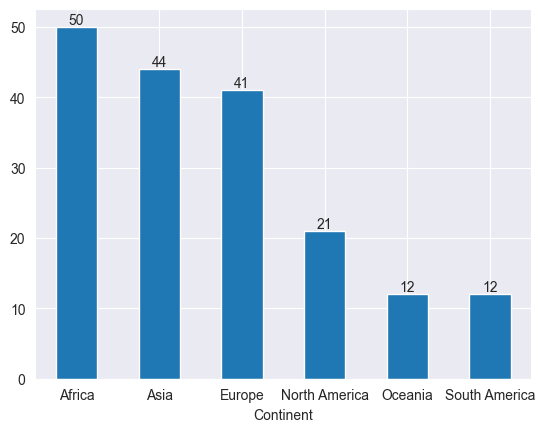

In [33]:
fig,axs=plt.subplots(1,1)
df['Continent'].value_counts().plot(kind='bar',rot=0,ax=axs)
for container in axs.containers:
    axs.bar_label(container)

Observations:
1. Africa has the most countries present in our dataset, followed by Asia and Europe

<h3>2. Which countries have the highest of the three different metrics we have mentioned?</h3>

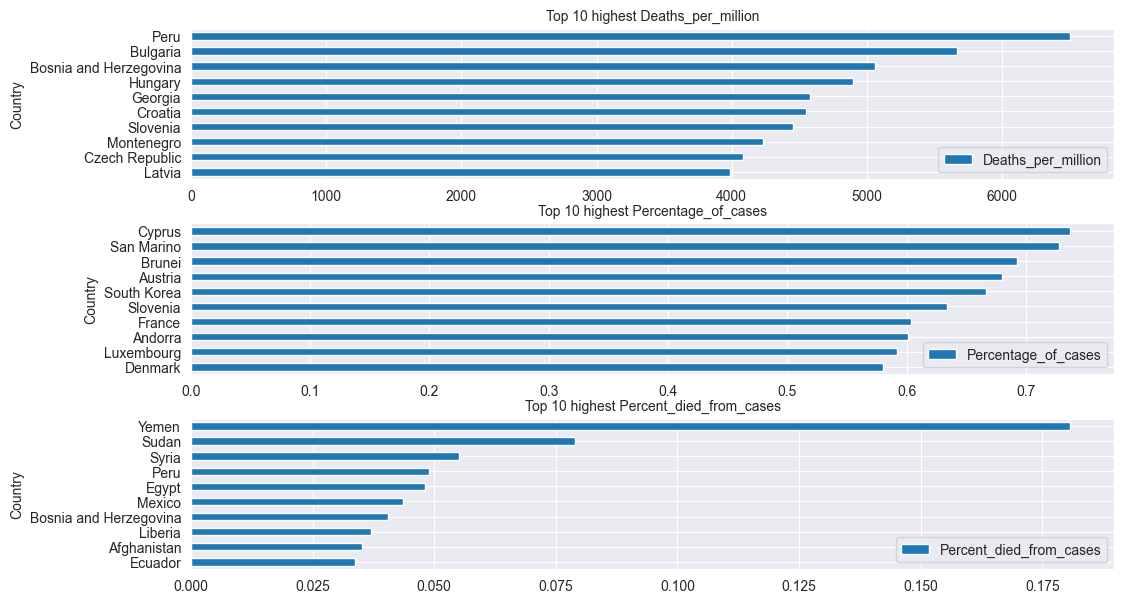

In [32]:
fig, axs = plt.subplots(3,1,figsize=(10,6))
fig.tight_layout()

for i in range(len(metriclist)):
    
    (df.sort_values(by=metriclist[i],ascending=False)
     .head(10)
     .plot(kind='barh', y=metriclist[i],x='Country',ax=axs[i],title=f'Top 10 highest {metriclist[i]}')
     .legend(loc='lower right'))
    
    axs[i].invert_yaxis()
    axs[i].title.set_size(10)

Observation:
1. Peru has the highest number of deaths per million in the population.
2. Yemen has the highest percentage of dying from getting COVID. They are also a big margin compared to the 2nd one. Upon searching a bit more, Yemen is currently at a war that resulted to the instability of their health facilities and even their testing capacity.
3. The highest percentage of cases are quite near with one another and upon looking a majority of it comes from a high or very high country development. 

<h3>3. How is the different Country Development distributed per Continent?</h3>

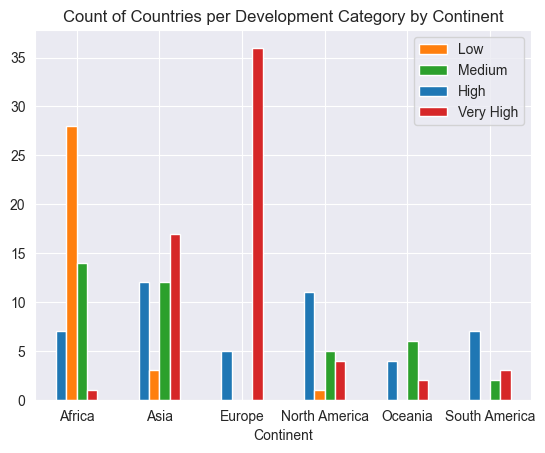

In [34]:
(df.groupby(['Continent','Country_Development'],as_index=False)[['Country']]
 .count()
 .pivot(index='Continent',columns='Country_Development',values='Country')
 .plot(kind='bar',title="Count of Countries per Development Category by Continent",rot=0))

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,0,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

Observation:
1. Europe has the most number of Very High country development, they also do not have Medium, and Low country development. This may not be the case though as there were some countries that were not included in this analysis.
2. The counterpart for this is in Africa which has the most number of Low developed countries, and the highest Medium developed countries. 

<h3>4. Which continents have the highest of the three different metrics we have mentioned?</h3>

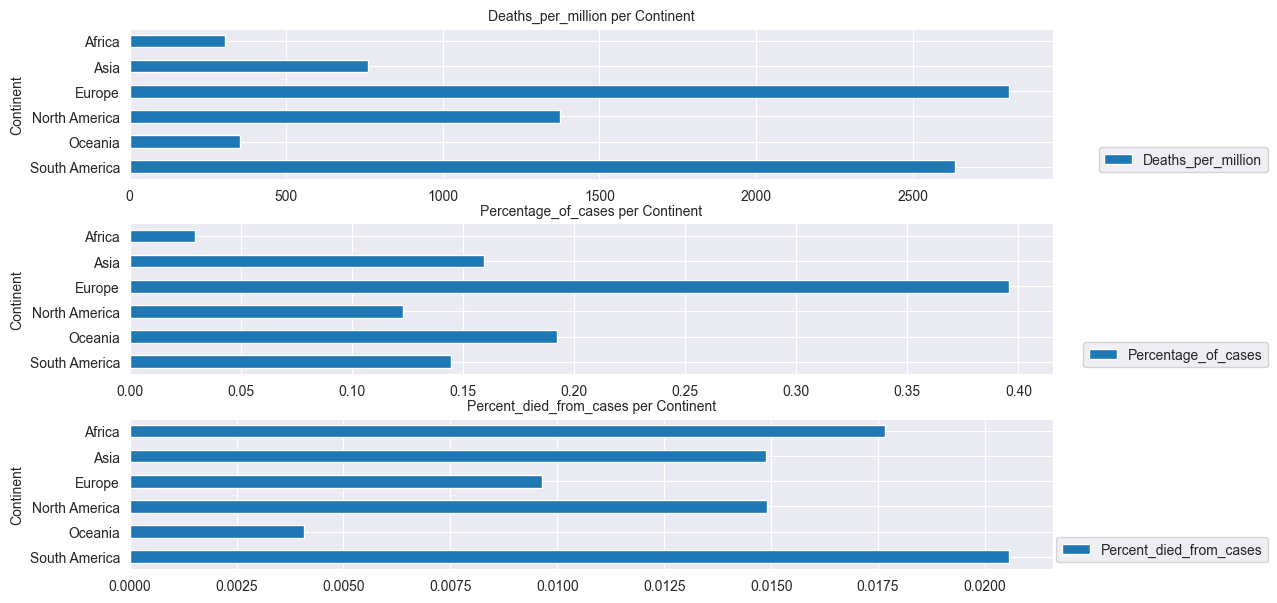

In [35]:
fig, axs = plt.subplots(3,1,figsize=(10,6))
fig.tight_layout()

for i in range(len(metriclist)):
    
    (df.groupby(['Continent'],as_index=False)[[metriclist[i]]]
     .mean()
     .sort_values('Continent',ascending=False)
     .plot(kind='barh',y=metriclist[i],x='Continent',ax=axs[i],title=f'{metriclist[i]} per Continent')
     .legend(bbox_to_anchor=(1.24,0),loc='lower right'))
    axs[i].title.set_size(10)

Observation:
1. Europe and South America has the most number of deaths per population. They are also far ahead compared to the rest of the continents.
2. Europe also has the highest percentage of cases from the population. A probable explanation to this is the weather across the majority of the continent.  Since COVID affects cold areas more, this may be the reason why they had the higher average.
3. South America, and Africa has the highest percentage of people dying from positive cases.
4. One interesting this is that even though Europe has the highest percentage of cases from the population, they are the 2nd lowest percentage of dying.

<h3>5. How many are countries in each of the Country Development?</h3>

<Axes: title={'center': 'Count of Countries per Country_Development'}, xlabel='Country_Development'>

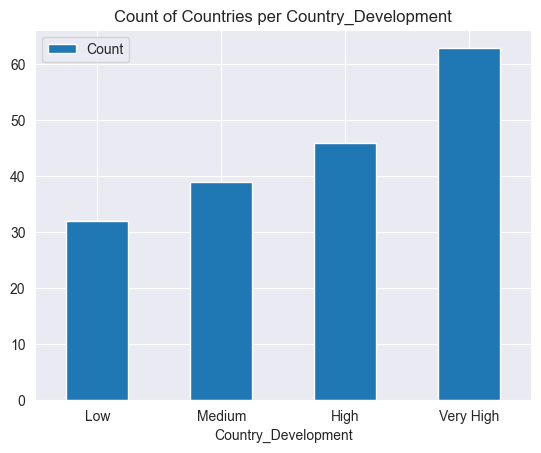

In [36]:
(df.groupby(['Country_Development'],as_index=True)[['Country']]
 .count()
 .reindex(development_list)
 .rename(columns={'Country':'Count'})
 .plot(kind='bar',rot=0, title='Count of Countries per Country_Development'))

Observation:
1. Very high has the highest number of countries
2. Low has the lowest number of countries.

<h3>6. Are there any significant difference for the three metrics amongst the different country development levels?</h3>

I can easily portray this through using a box plot as seen below. If the body or median lies outside another box plot, it can signify a statistical difference.

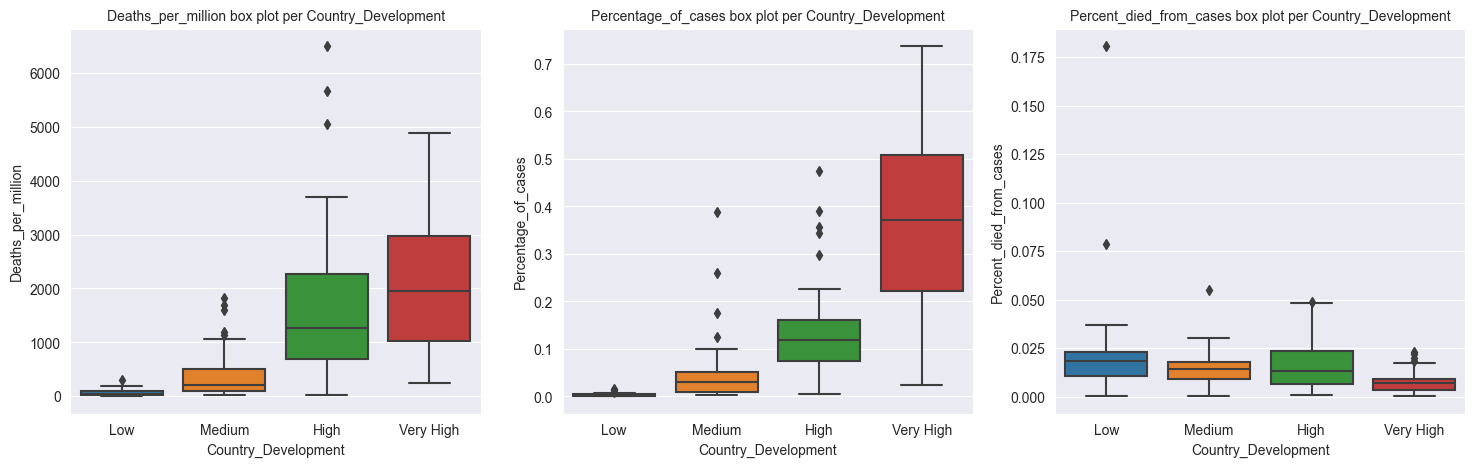

In [37]:
fig,axs = plt.subplots(1,3,figsize=(18,5))

for i in range(len(metriclist)):
    box_df = df[[metriclist[i],'Country_Development']]
    sns.boxplot(data = box_df, x='Country_Development',y=metriclist[i],order=development_list,ax=axs[i],showfliers=True)
    axs[i].set_title(f'{metriclist[i]} box plot per Country_Development',fontsize=10)

Observations:
1. There are outliers in all the graphs, however these are real data thus we will not be removing them.
2. The deaths per million, and the percentage of cases clearly shows significant differences across the different country development levels. 
3. One thing to note is that even through Very High country development has the highest ranges of deaths per million and percentage of cases, they have the lowest percentage of dying.

In order to validate even further if there are any significant differences, let us do a statistical test to compare the means. Note that the significance level we will be using is 0.05

In [50]:
#Creating a function to do a statistical test and showing the results
def stattest(test1,test2):
 tstat,pvalue = stats.ttest_ind(a=test1,b=test2,equal_var=False)
 if pvalue < 0.05:
  print(f'The p-value of {pvalue} is less than the significant level of 0.05, therefore reject Ho, indicating significant difference between means')
 else:
  print(f'The p-value of {pvalue} is greater than the significant level of 0.05, therefore do no reject Ho, indicating no significant difference between means')
 return

In [40]:
very_high_death_percent = df[(df['Country_Development'] == 'Very High')]['Percent_died_from_cases']
low_death_percent = df[(df['Country_Development'] == 'Low')]['Percent_died_from_cases']
stattest(low_death_percent,very_high_death_percent)

The p-value of 0.004801113018372205 is less than the significant level of 0.05, therefore reject Ho, indicating significant difference between means


I want to do a statistical test to see specifically the percentage of dying if the Very Highly developed countries performed better in mitigating it as compared to Low, and High Developed countries.  
From the statistical test above, you can see that there is a significant difference comparing low and very high developed countries.  Since very high developed countries have more facilities they were able to mitigate the effects of COVID 19 better than Low developed countries.

In [41]:
high_death_percent = df[(df['Country_Development'] == 'High')]['Percent_died_from_cases']
stattest(high_death_percent,very_high_death_percent)

The p-value of 1.0941067074356752e-05 is less than the significant level of 0.05, therefore reject Ho, indicating significant difference between means


In the statistical test above, I wanted to compare the means of High Developed Countries and Very High Developed countries.  In the test it was shown that there is a significant difference between the two. 

<h3>7. What were the outliers?</h3>

We can think that these outliers were those that were affected the most in the different categories which is why I wanted to see where they came from and how they performed compared to the otheres

In [42]:
#This function creates a upper and lower limits of the box plot to see who exceeded these values
 def getoutliers(metric,development):
    inspect_outlier_df = df.copy()
    upper_quartiles = inspect_outlier_df[inspect_outlier_df['Country_Development']==development][metric].quantile(0.75)
    lower_quartiles = inspect_outlier_df[inspect_outlier_df['Country_Development']==development][metric].quantile(0.25)
    iqr = upper_quartiles - lower_quartiles
    upper_limit = upper_quartiles + 1.5*iqr
    lower_limit = lower_quartiles - 1.5*iqr
    return inspect_outlier_df[(inspect_outlier_df['Country_Development']==development)&((inspect_outlier_df[metric]>upper_limit)|(inspect_outlier_df[metric]<lower_limit))]

In [43]:
#We are creating a dataframe using the function above and a for loop to combine all these outliers
outliers_df = pd.DataFrame(columns = df.columns)
for i in range(len(development_list)):
    for j in range(len(metriclist)):
        outliers_df = pd.concat([outliers_df,getoutliers(metriclist[j],development_list[i])])

In [44]:
validation = []
for i in range(len(development_list)):
    for j in range(len(metriclist)):
        validation.append(getoutliers(metriclist[j],development_list[i]).shape[0])
sum(validation) == outliers_df.shape[0]

True

One thing to note here was that there are duplicated values.  This means that there were countries that appeared on two or more of the metrics we were measuring. It can be seen in the table below

In [45]:
outliers_df[outliers_df.duplicated()]

,Country,HDI,Country_Development,Deaths_per_million,Deaths,Cases,Continent,Population_in_millions,Percentage_of_cases,Percent_died_from_cases
158,Lesotho,0.514,Low,306,706,34490,Africa,2.307190,0.014949,0.020470
117,Belize,0.683,Medium,1697,688,70782,North America,0.405421,0.174589,0.009720
78,Peru,0.762,High,6504,221465,4519052,South America,34.050584,0.132716,0.049007


In [46]:
outliers_df = outliers_df.drop_duplicates()

In [47]:
outliers_df['Outlier'] = 'Yes'
df = df.join(outliers_df['Outlier'])
df['Outlier'] = df['Outlier'].replace(np.nan,'No')

<Axes: xlabel='Continent'>

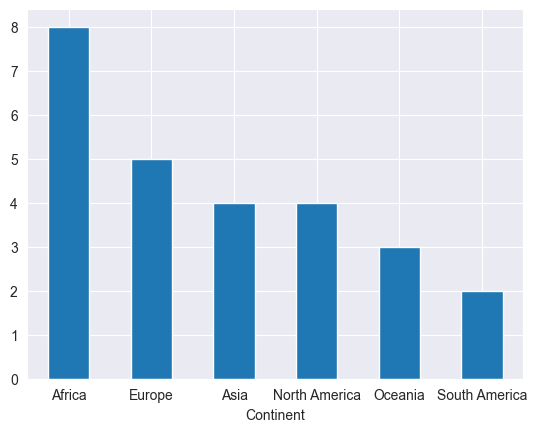

In [48]:
outliers_df['Continent'].value_counts().plot(kind='bar',rot=0)

Observation:
1. Africa has the most number of outliers present in the dataframe. This means Africa was hit and affected by COVID 19 more. This coincides with our data given that they are not exposed to better healthcare industries based from the HDI.

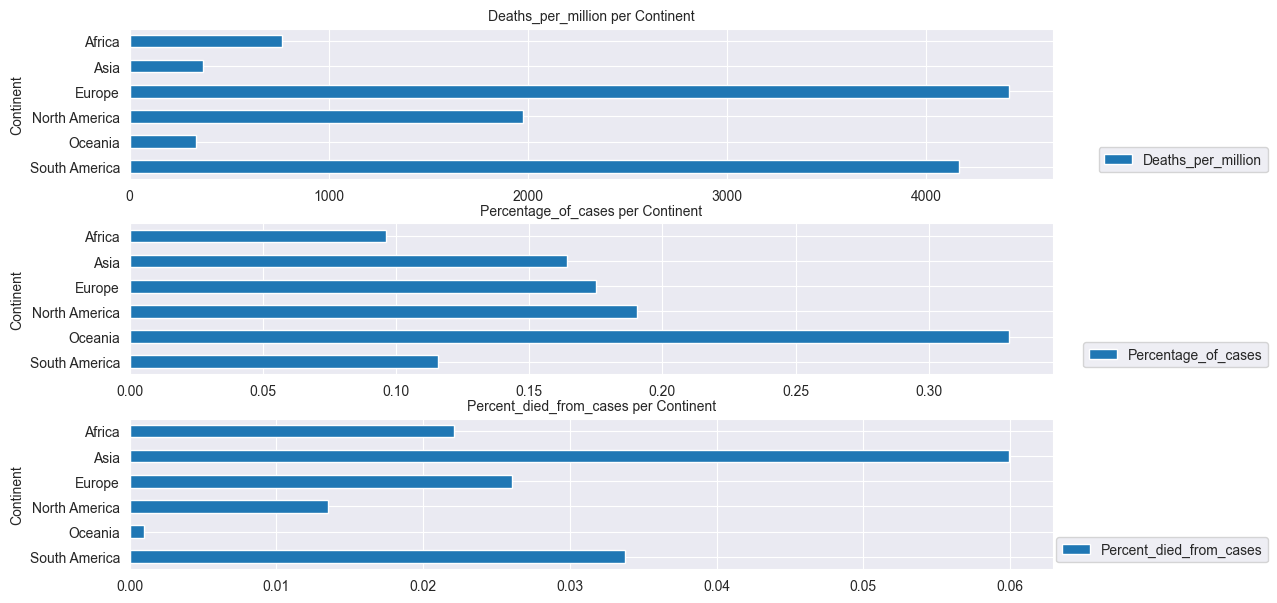

In [49]:
fig, axs = plt.subplots(3,1,figsize=(10,6))
fig.tight_layout()

for i in range(len(metriclist)):
    
    (outliers_df.groupby(['Continent'],as_index=False)[[metriclist[i]]]
     .mean()
     .sort_values('Continent',ascending=False)
     .plot(kind='barh',y=metriclist[i],x='Continent',ax=axs[i],title=f'{metriclist[i]} per Continent')
     .legend(bbox_to_anchor=(1.24,0),loc='lower right'))
    axs[i].title.set_size(10)

Observation:
1. There are not much difference if we compare to the earlier graph that we had in question 2 with the comparison of Deaths per million per Continent. It behave exactly the same way with our outlier dataset.
2. In the percentage of cases per continent we could see that Oceania became the highest continent in this area, meanwhile Europe was the first earlier in Question 2.
3. In this percentage of death per continent, Asia became the first one in this graph, as compared to South America in Question 2. This means that there are countries in Asia that had that much a higher percentage of dying. In this case it was Yemen has the highest of 18% probability of dying.